In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

In [2]:
file = '../data/trajectories.csv'
df = pd.read_csv(file)
trayectories_df = pd.DataFrame(df)

# Fecha del netCDF
dates = trayectories_df['date'].unique()
dates_df = pd.DataFrame(dates, columns=['date'])

fecha = dates_df['date'][2]
path_chlc = '../data/chlc'

In [3]:
# Cambia formato de yyyy-mm-dd a yyyymmdd
date = fecha.replace('-', '')
chlc_data_ext = 'ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-'
filename = f"{path_chlc}/{chlc_data_ext}{date}-fv6.0.nc"
# If filename exists the open it and get lat, lon and SST, else SST = 'NA'
nc_file = nc.Dataset(filename)
print(nc_file.variables.keys())
# Get lat and lon
lat = nc_file['lat'][:]
lon = nc_file['lon'][:]
# Get SST
chlor_a = nc_file['chlor_a'][0][:,:]
# Close netCDF
nc_file.close()


dict_keys(['MERIS_nobs', 'MODISA_nobs', 'OLCI-A_nobs', 'OLCI-B_nobs', 'SeaWiFS_nobs', 'VIIRS_nobs', 'chlor_a', 'crs', 'lat', 'lon', 'time', 'total_nobs'])


/tmp/ipykernel_395/2903028905.py:8: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()
/tmp/ipykernel_395/2903028905.py:9: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.clim(0,1)


Text(0.5, 1.0, 'Chlorophyll-a concentration on 2014-01-21')

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:732: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


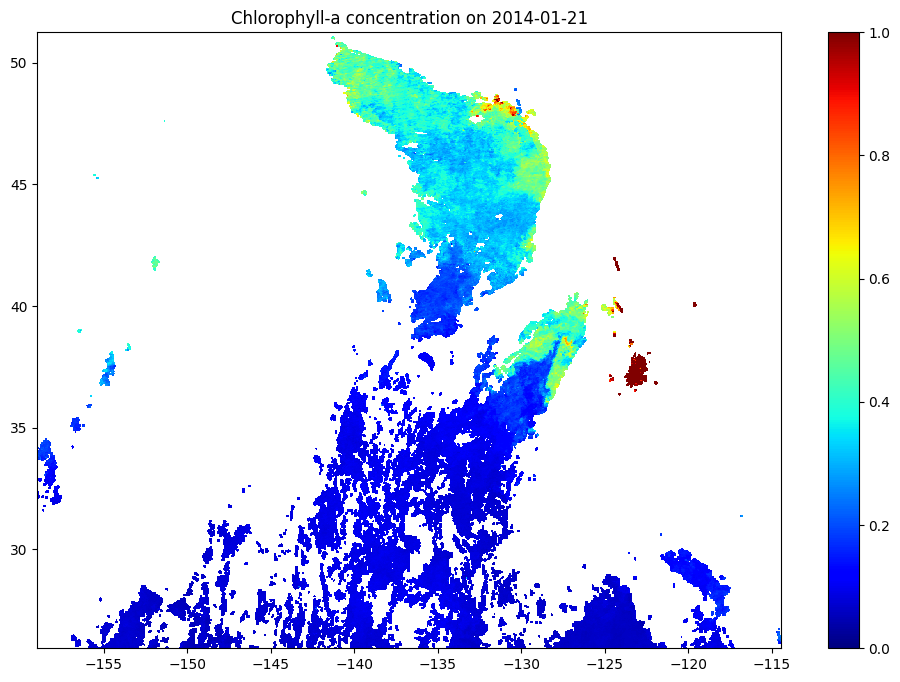

: 

In [5]:
min_lat = 25.933687
max_lat = 51.25798
min_lon = -158.980523
max_lon = -114.42687

plt.figure(figsize=(12,8))
plt.pcolor(lon, lat, chlor_a, cmap='jet')
plt.colorbar()
plt.clim(0,1)
# Zoom in on the data
plt.xlim(min_lon, max_lon)
plt.ylim(min_lat, max_lat)
plt.title(f'Chlorophyll-a concentration on {fecha}')